# Data Preparation

In [263]:
# Load the "autoreload" extension
%load_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [264]:
# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, os.pardir,'src')
sys.path.append(src_dir)

In [1]:
#Take a look at the raw data :
import pandas as pd
from pandas import read_csv
path = "../../data/raw/2010-2015_ili_activity_sub_climate.csv"

raw_data = read_csv(path)
raw_data.head()

,Unnamed: 0,STATE,YEAR,MONTH,WEEK,week_TEMP,week_MAX,week_MIN,week_PRCP,week_STP,...,Longitude,total_specimens,percent_positive,a_2009_h1n1,a_h1,a_h3,a_subtyping_not_performed,a_unable_to_subtype,b,h3n2v
0,1,AK,2010,10,40,4.466784,8.087427,1.523854,3.328448,988.501333,...,-152.404419,40,0.0,0,0,0,0,0,0,0
1,2,AK,2010,10,41,1.498712,4.759368,-1.324239,1.905776,994.250582,...,-152.404419,38,0.0,0,0,0,0,0,0,0
2,3,AK,2010,10,42,0.999415,4.187588,-1.748361,2.750675,991.763411,...,-152.404419,21,0.0,0,0,0,0,0,0,0
3,4,AK,2010,10,43,1.048946,4.319435,-1.753710,1.127506,990.355025,...,-152.404419,37,0.0,0,0,0,0,0,0,0
4,5,AK,2010,10,44,-0.601093,2.301096,-3.105205,2.766286,976.572763,...,-152.404419,32,0.0,0,0,0,0,0,0,0


In [57]:
# display the variables
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11838 entries, 0 to 11837
Data columns (total 31 columns):
Unnamed: 0                   11838 non-null int64
STATE                        11838 non-null object
YEAR                         11838 non-null int64
MONTH                        11838 non-null int64
WEEK                         11838 non-null int64
week_TEMP                    11838 non-null float64
week_MAX                     11838 non-null float64
week_MIN                     11838 non-null float64
week_PRCP                    11838 non-null float64
week_STP                     11838 non-null float64
mavg_4weeks_TEMP             11838 non-null float64
mavg_4weeks_MAX              11838 non-null float64
mavg_4weeks_MIN              11838 non-null float64
mavg_4weeks_PRCP             11838 non-null float64
diff_week_TEMP               11838 non-null float64
percent_diff                 11838 non-null float64
statename                    11838 non-null object
ili_activity_labe

## Exp.1

I want to see if it's possible to predict the ILI level of the data according to the :
  - coordonate
  - state
  - temperature
  - date
  - a_h1 (subtype)


## Hypothesis 1 :

I think that latitude is correlated with the the activity level of influenza so I expect to observe more ILI activity more the I go in the extreme latitude 

In [58]:
# taking a look to my data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11838 entries, 0 to 11837
Data columns (total 31 columns):
Unnamed: 0                   11838 non-null int64
STATE                        11838 non-null object
YEAR                         11838 non-null int64
MONTH                        11838 non-null int64
WEEK                         11838 non-null int64
week_TEMP                    11838 non-null float64
week_MAX                     11838 non-null float64
week_MIN                     11838 non-null float64
week_PRCP                    11838 non-null float64
week_STP                     11838 non-null float64
mavg_4weeks_TEMP             11838 non-null float64
mavg_4weeks_MAX              11838 non-null float64
mavg_4weeks_MIN              11838 non-null float64
mavg_4weeks_PRCP             11838 non-null float64
diff_week_TEMP               11838 non-null float64
percent_diff                 11838 non-null float64
statename                    11838 non-null object
ili_activity_labe

In [59]:
%who

df	 ili_activity	 ili_data	 mpl	 path	 pd	 plt	 raw	 raw_data	 
read_csv	 select	 sns	 timeit	 


In [60]:
# %load ../../src/data/make_dataset.py
#!/usr/bin/

# -*- coding: utf-8 -*-
%aimport data.helpers
from data.helpers import load_data
from data.helpers import save_data
from data.helpers import set_index_to_date

ERROR:root:Line magic function `%aimport` not found.


ImportError: No module named data.helpers

In [61]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
sns.set(style="whitegrid", color_codes=True)
# Set context to `"paper"`
sns.set_context("paper", font_scale=2)

In [62]:
df = raw_data
df.head()

,Unnamed: 0,STATE,YEAR,MONTH,WEEK,week_TEMP,week_MAX,week_MIN,week_PRCP,week_STP,...,Longitude,total_specimens,percent_positive,a_2009_h1n1,a_h1,a_h3,a_subtyping_not_performed,a_unable_to_subtype,b,h3n2v
0,1,AK,2010,10,40,4.466784,8.087427,1.523854,3.328448,988.501333,...,-152.404419,40,0.0,0,0,0,0,0,0,0
1,2,AK,2010,10,41,1.498712,4.759368,-1.324239,1.905776,994.250582,...,-152.404419,38,0.0,0,0,0,0,0,0,0
2,3,AK,2010,10,42,0.999415,4.187588,-1.748361,2.750675,991.763411,...,-152.404419,21,0.0,0,0,0,0,0,0,0
3,4,AK,2010,10,43,1.048946,4.319435,-1.753710,1.127506,990.355025,...,-152.404419,37,0.0,0,0,0,0,0,0,0
4,5,AK,2010,10,44,-0.601093,2.301096,-3.105205,2.766286,976.572763,...,-152.404419,32,0.0,0,0,0,0,0,0,0


In [63]:
def far_to_cel(value):
    tc = (value - 32)*1.8
    return tc

#df.week_TEMP.apply(far_to_cel).tail()
#df.week_TEMP.mean()

df.eval('week_TEMP_C = (week_TEMP - 32)*1.8', inplace=True)
df.head(10)

,Unnamed: 0,STATE,YEAR,MONTH,WEEK,week_TEMP,week_MAX,week_MIN,week_PRCP,week_STP,...,total_specimens,percent_positive,a_2009_h1n1,a_h1,a_h3,a_subtyping_not_performed,a_unable_to_subtype,b,h3n2v,week_TEMP_C
0,1,AK,2010,10,40,4.466784,8.087427,1.523854,3.328448,988.501333,...,40,0.00,0,0,0,0,0,0,0,-49.559789
1,2,AK,2010,10,41,1.498712,4.759368,-1.324239,1.905776,994.250582,...,38,0.00,0,0,0,0,0,0,0,-54.902319
2,3,AK,2010,10,42,0.999415,4.187588,-1.748361,2.750675,991.763411,...,21,0.00,0,0,0,0,0,0,0,-55.801054
3,4,AK,2010,10,43,1.048946,4.319435,-1.753710,1.127506,990.355025,...,37,0.00,0,0,0,0,0,0,0,-55.711897
4,5,AK,2010,10,44,-0.601093,2.301096,-3.105205,2.766286,976.572763,...,32,0.00,0,0,0,0,0,0,0,-58.681967
5,6,AK,2010,11,44,-1.313730,1.608197,-4.240984,2.716079,984.122286,...,32,0.00,0,0,0,0,0,0,0,-59.964713
6,7,AK,2010,11,45,-2.910656,-0.365805,-5.476263,1.738217,990.497565,...,45,4.44,0,0,1,0,0,1,0,-62.839180
7,8,AK,2010,11,46,-4.643208,-1.511020,-7.702579,1.413886,1007.933929,...,32,0.00,0,0,0,0,0,0,0,-65.957775
8,9,AK,2010,11,47,-1.510304,1.245657,-4.124883,2.062454,1002.941951,...,29,0.00,0,0,0,0,0,0,0,-60.318548
9,10,AK,2010,11,48,-7.126437,-3.912315,-10.231908,1.033219,999.706164,...,36,0.00,0,0,0,0,0,0,0,-70.427586


In [64]:
# select the data - remove 2010 because it was incomplete 
df = df[
    (df.YEAR > 2010)
]

In [65]:
df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11231 entries, 15 to 11837
Data columns (total 32 columns):
Unnamed: 0                   11231 non-null int64
STATE                        11231 non-null object
YEAR                         11231 non-null int64
MONTH                        11231 non-null int64
WEEK                         11231 non-null int64
week_TEMP                    11231 non-null float64
week_MAX                     11231 non-null float64
week_MIN                     11231 non-null float64
week_PRCP                    11231 non-null float64
week_STP                     11231 non-null float64
mavg_4weeks_TEMP             11231 non-null float64
mavg_4weeks_MAX              11231 non-null float64
mavg_4weeks_MIN              11231 non-null float64
mavg_4weeks_PRCP             11231 non-null float64
diff_week_TEMP               11231 non-null float64
percent_diff                 11231 non-null float64
statename                    11231 non-null object
ili_activity_lab

In [67]:
select=['weekend','STATE','YEAR','MONTH','WEEK', 'week_TEMP','week_PRCP', 'ili_activity_label','ili_activity_group', 'a_h1','Latitude', 'Longitude']
ili_activity = df[select]
ili_activity.rename(columns={'weekend':'Date'}, inplace=True)
#lowering the columns
ili_activity.columns = map(str.lower, ili_activity.columns)
ili_activity.head()
#store at least 20 WEEK per year

,date,state,year,month,week,week_temp,week_prcp,ili_activity_label,ili_activity_group,a_h1,latitude,longitude
15,2011-01-08,AK,2011,1,1,-3.565308,1.930157,Level 1,Minimal,0,61.370716,-152.404419
16,2011-01-15,AK,2011,1,2,-8.022067,0.250413,Level 2,Minimal,0,61.370716,-152.404419
17,2011-01-22,AK,2011,1,3,-14.500581,0.936114,Level 3,Minimal,0,61.370716,-152.404419
18,2011-01-29,AK,2011,1,4,-9.774797,1.784652,Level 2,Minimal,0,61.370716,-152.404419
19,2011-02-05,AK,2011,1,5,-4.533875,0.342017,Level 5,Low,0,61.370716,-152.404419


In [68]:
ili_activity.groupby(['state']).size()

state
AK    292
AL    285
AR    281
AZ    295
CA    295
CO    293
CT    277
DE    222
GA    295
HI    295
IA    210
ID     91
IL    290
IN    295
KS     84
KY    295
MA    225
MD    245
ME    158
MI    179
MN    290
MO    295
MS    211
MT    250
NC    183
ND    149
NE    268
NH    137
NM    203
NV    210
NY    295
OH    273
OK    274
OR    249
PA    295
SC    261
SD    269
TN    225
TX    295
UT    293
VA    289
VT     85
WA    295
WI    284
WV    295
WY    156
dtype: int64

In [69]:
ili_activity.groupby(['year']).size()

year
2011    2152
2012    2345
2013    2274
2014    2514
2015    1946
dtype: int64

In [2]:
ili_data = ili_activity
%store ili_data

NameError: name 'ili_activity' is not defined

In [71]:
# Max latitude ?
max_lat = ili_data.latitude.max()
min_lat = ili_data.latitude.min()
print("Max: {}, Min: {}".format(max_lat, min_lat))

NameError: name 'ili_h1' is not defined

In [72]:
max_lat = ili_data.week_temp.max()
min_lat = ili_data.week_temp.min()
print("Max: {}, Min: {}".format(max_lat, min_lat))

Max: 34.6319767442, Min: -23.2666666667


In [459]:
import numpy as np

#create group based on latitude range
bins = [0, 30, 60, 90]
labels = ['Low latitude', 'Mid latitude', 'High Latitude']
lat_groups = pd.cut(ili_h1.Latitude, bins, labels=labels)
ili_h1['lat_label'] = lat_groups

groups = ili_h1.groupby(['YEAR','MONTH','lat_label', 'ili_activity_label'], as_index=False)

In [432]:
pd.value_counts(ili_h1.ili_activity_label)

Level 1     4248
Level 2      872
Level 3      594
Level 10     480
Level 4      422
Level 5      316
Level 6      269
Level 7      205
Level 0      168
Level 8      151
Level 9      111
Name: ili_activity_label, dtype: int64

In [406]:

#create group based on temperature 
bins = [-20 , 0 , 20, np.inf]
labels = ['<0','0-20', '20<']
temp_groups = pd.cut(ili_h1.week_TEMP, bins, labels=labels)
ili_h1['temp_group'] = temp_groups

groups = ili_h1.groupby(['temp_group', 'ili_activity_label'])
groups.size()

#groups.count()

temp_group  ili_activity_label
-20-0       Level 1                529
            Level 10               150
            Level 2                195
            Level 3                172
            Level 4                159
            Level 5                133
            Level 6                 99
            Level 7                 69
            Level 8                 57
            Level 9                 34
0-20        Level 0                 74
            Level 1               2545
            Level 10               316
            Level 2                608
            Level 3                378
            Level 4                229
            Level 5                167
            Level 6                154
            Level 7                123
            Level 8                 90
            Level 9                 72
20+         Level 0                 94
            Level 1               1173
            Level 10                14
            Level 2              

In [466]:
group_df = groups.head().head()
group_df.drop(['count','c'], 1, inplace=True)
group_df.head()

In [467]:
%store group_df

Stored 'group_df' (DataFrame)


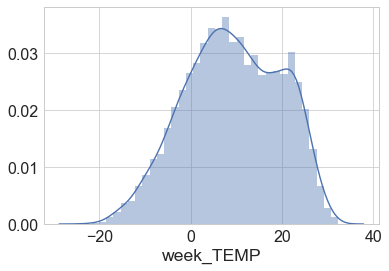

In [298]:
#calculate the count of all the ILI
def is_old_func_series(value):
    return value > 60
titanic['is_old'] = titanic.age.apply(is_old_func_series)

In [446]:
ili_h1.head()

,index,STATE,YEAR,MONTH,WEEK,week_TEMP,ili_activity_label,a_h1,Latitude,Longitude,count,c,lat_label,temp_group
0,15,AK,2011,1,1,-3.565308,Level 1,0,61.370716,-152.404419,NaN,NaN,High Latitude,-20-0
1,16,AK,2011,1,2,-8.022067,Level 2,0,61.370716,-152.404419,NaN,NaN,High Latitude,-20-0
2,17,AK,2011,1,3,-14.500581,Level 3,0,61.370716,-152.404419,NaN,NaN,High Latitude,-20-0
3,18,AK,2011,1,4,-9.774797,Level 2,0,61.370716,-152.404419,NaN,NaN,High Latitude,-20-0
4,19,AK,2011,1,5,-4.533875,Level 5,0,61.370716,-152.404419,NaN,NaN,High Latitude,-20-0


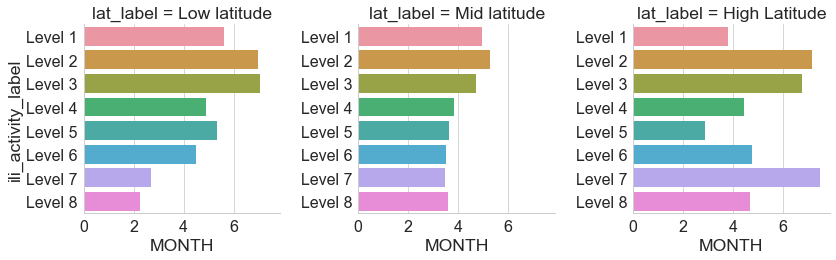

In [451]:
state = ili_h1[(ili_h1.STATE == 'NY')]
l_order = ['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5', 'Level 6', 'Level 7', 'Level 8']
sns.factorplot(x="MONTH", 
               y="ili_activity_label", 
               col="lat_label",
              # col_wrap=3,
               ci=None,
               order = l_order,
               data=ili_h1, 
               kind="bar");

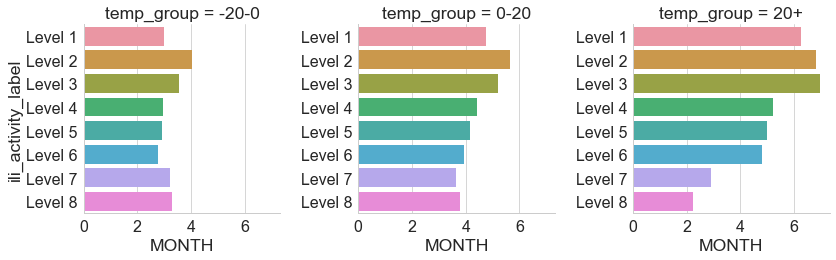

In [448]:
sns.factorplot(x="MONTH", 
               y="ili_activity_label", 
               col="temp_group",
              # col_wrap=3,
               ci=None,
               order = l_order,
               data=ili_h1, 
               kind="bar");

In [317]:
%aimport features.helpers
from features.helpers import load_data
from features.helpers import save_data
from features.helpers import norm_data
from features.helpers import encode_cat_data
from features.helpers import set_index_to_date
from features.helpers import save_pandas
from features.helpers import plot_data
from features.helpers import MultiColumnLabelEncoder
from datetime import datetime
import numpy as np

In [347]:
ili_h1 = MultiColumnLabelEncoder(columns = ['ili_activity_label']).fit_transform(ili_h1)
ili_h1[(ili_h1.ili_activity_label > 4)].head()

,index,STATE,YEAR,MONTH,WEEK,week_TEMP,ili_activity_label,a_h1,Latitude,Longitude,lat_label,temp_group
4,19,AK,2011,1,5,-4.533875,6,0,61.370716,-152.404419,50+,-20-0
5,20,AK,2011,2,5,-5.158333,6,0,61.370716,-152.404419,50+,-20-0
7,22,AK,2011,2,7,-12.688591,7,0,61.370716,-152.404419,50+,-20-0
8,23,AK,2011,2,8,-7.969686,7,0,61.370716,-152.404419,50+,-20-0
11,26,AK,2011,3,10,-8.258411,8,0,61.370716,-152.404419,50+,-20-0


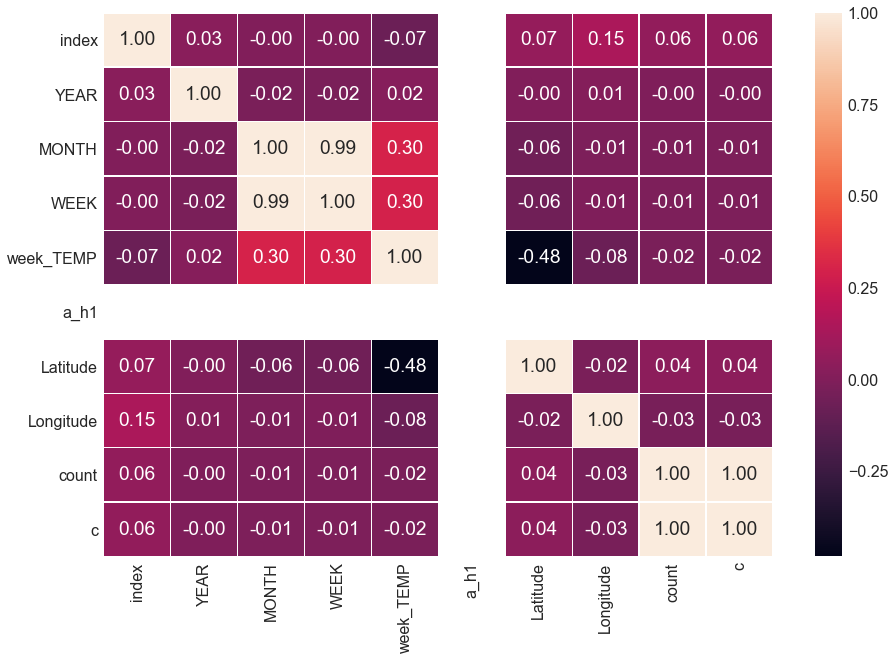

In [455]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(ili_h1.corr(), annot=True, fmt=".2f", linewidths=.5, ax=ax)

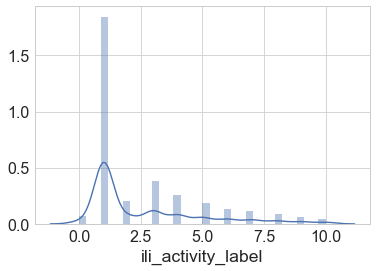

In [322]:
sns.distplot(ili_h1.ili_activity_label);

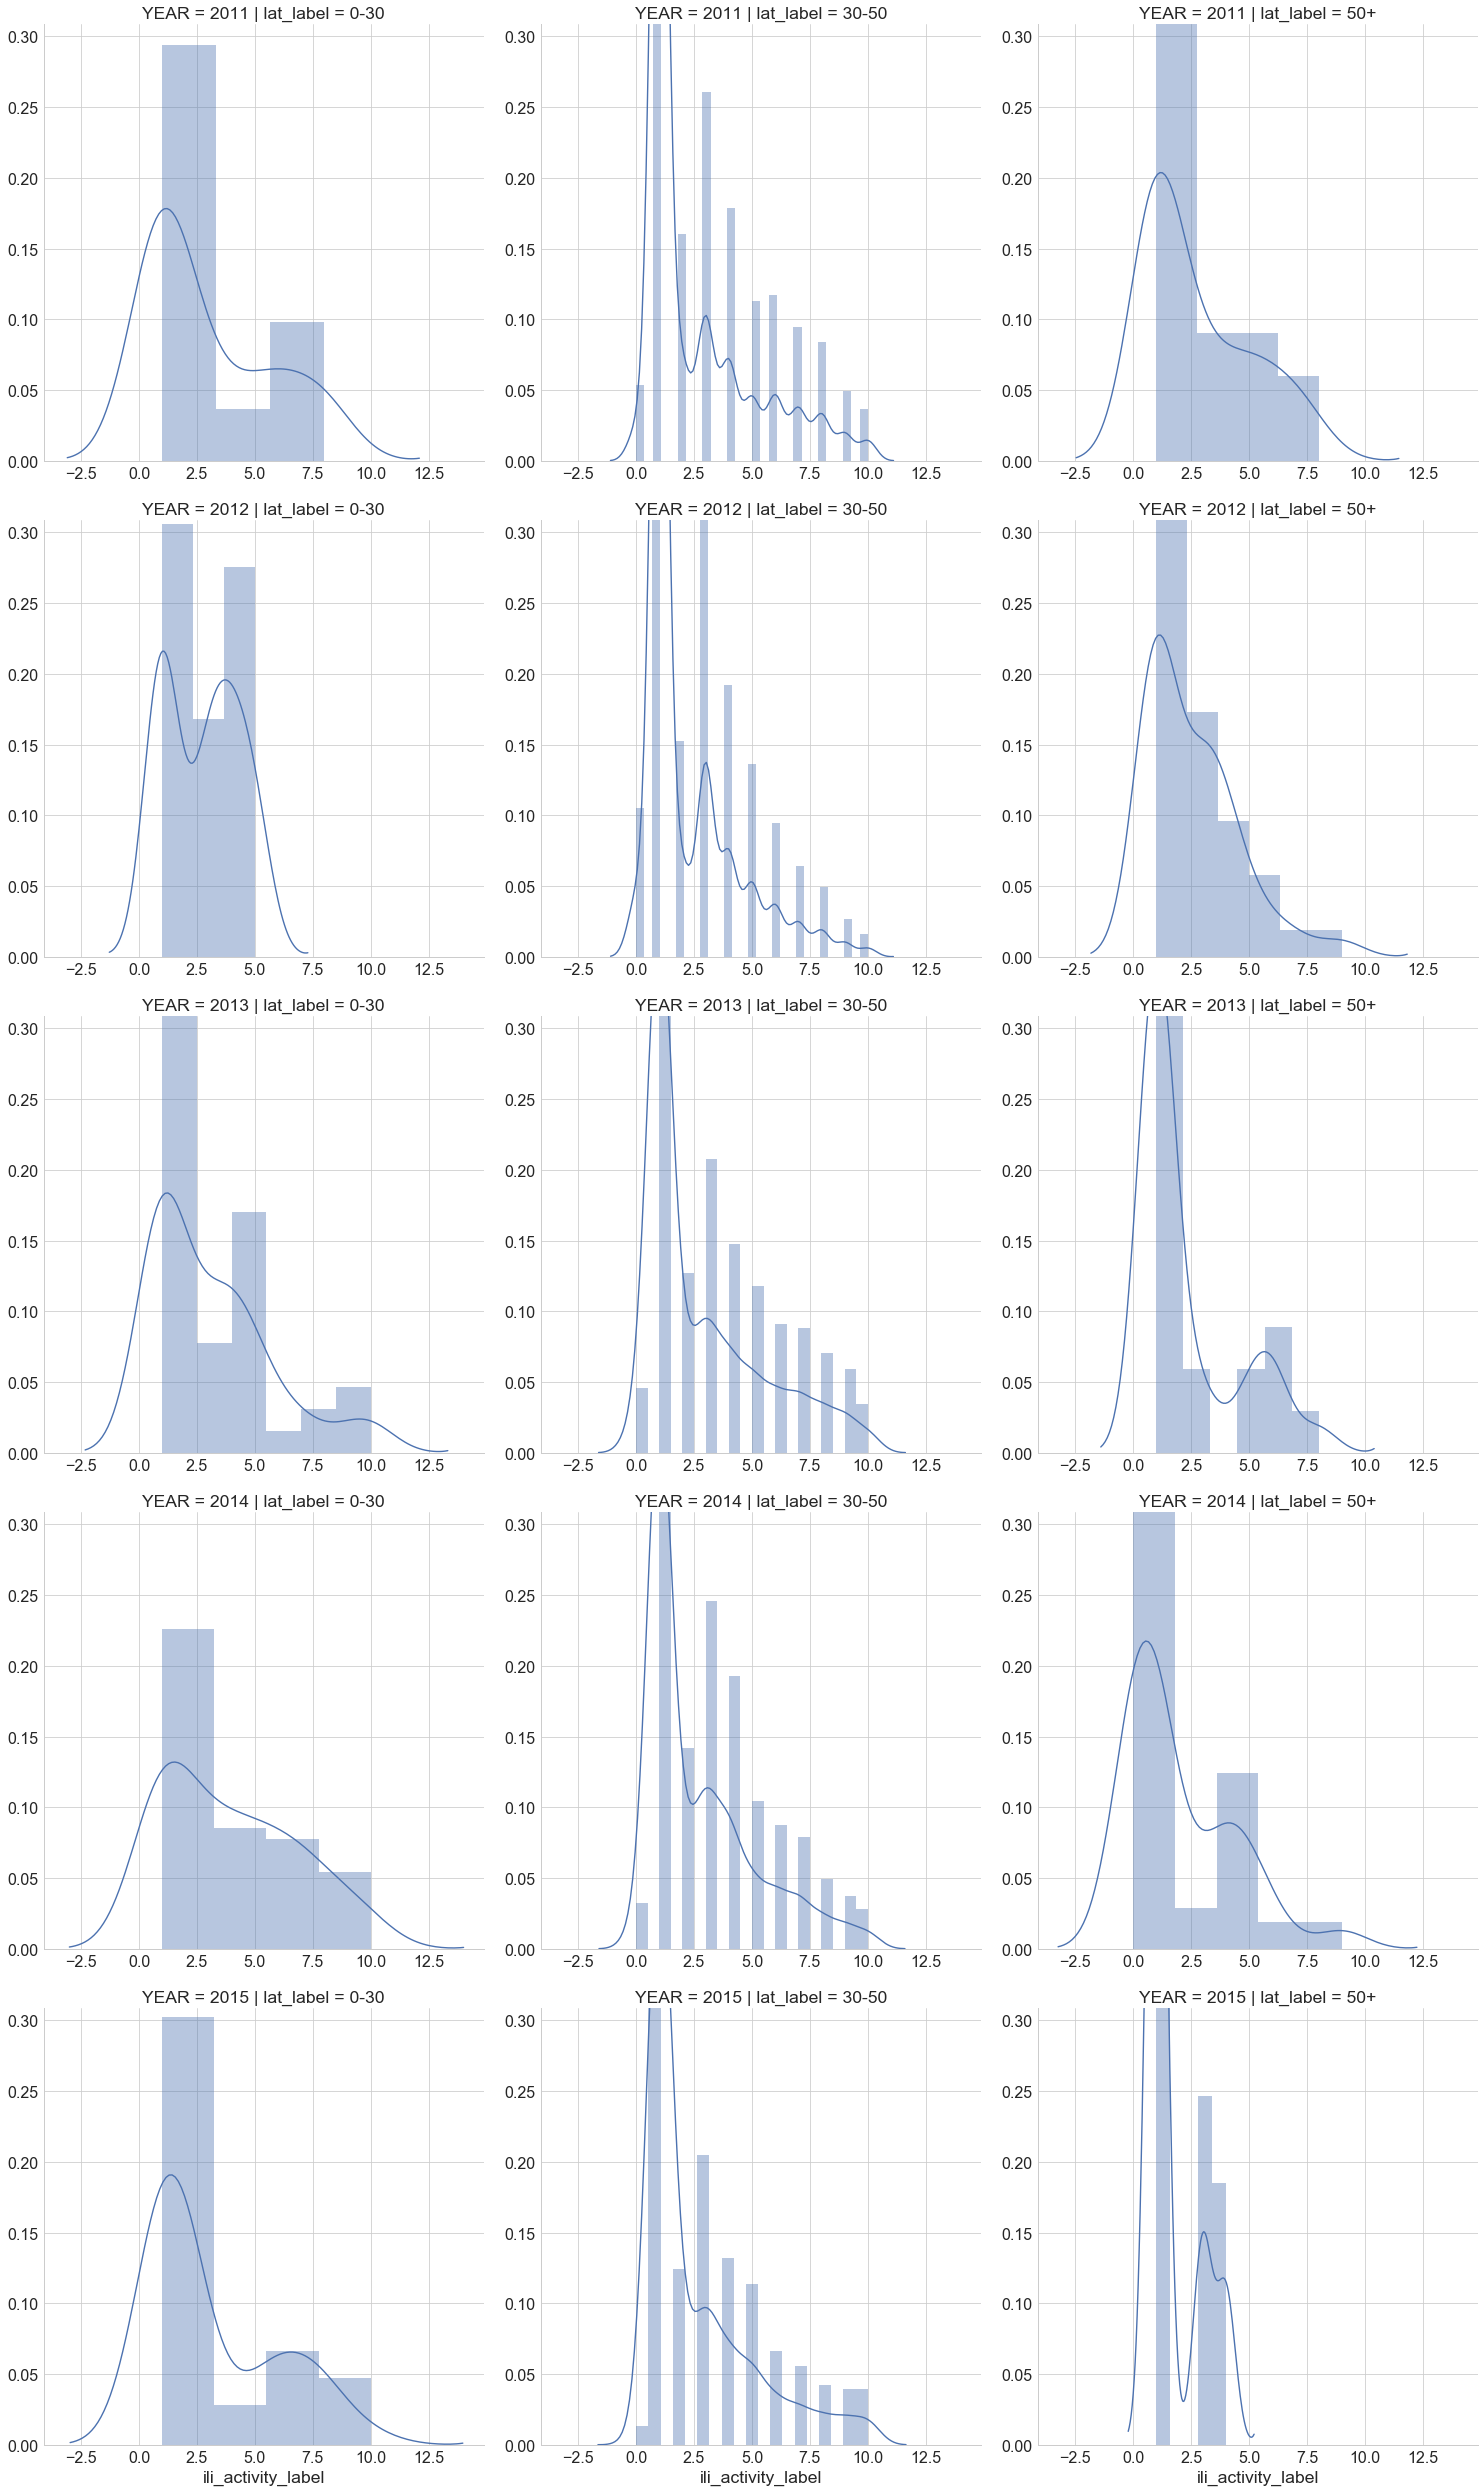

In [329]:
g = sns.FacetGrid(ili_h1, row="YEAR", col='lat_label', aspect=1, size=7);
g.map(sns.distplot, "ili_activity_label");